# Week 5
Ray Hu & Xietao Wang Lin

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

Parameters

In [2]:
gridPoints = 10

In [21]:
rods = np.loadtxt('rods.dat')
motors = np.loadtxt('motors.dat')
length = np.loadtxt('length_final.dat')
allLengths = np.loadtxt('length_all.dat')

numberOfRods = rods[:, 0].size

def gaussian(x, mu, sigma):
    return 1/((2*math.pi*(sigma**2))**(1/2)) * np.exp((-(x-mu)**2)/(2*(sigma**2)))


In [30]:
def calculateMotorPositions(RodsMatrix, MotorMatrix, numberOfMotors):

    motorPositions = np.zeros(numberOfMotors)
    position = RodsMatrix[0, 0] + MotorMatrix[0, 0]
    motorPositions[0] = position
    for motor in range(1, numberOfMotors):
        position = (RodsMatrix[motor, 0] + MotorMatrix[motor, 0])
        motorPositions[motor] = position
    
    return motorPositions

def plotSystem(RodsMatrix, MotorsMatrix, numberOfRods, gridPoints):

    motorPos = calculateMotorPositions(RodsMatrix, MotorsMatrix, numberOfRods)
    for row in range(0, numberOfRods):
        'Rods'
        y_r = np.ones(gridPoints)*row*0.2
        x_r = np.linspace(RodsMatrix[row, 0], RodsMatrix[row, 0] + RodsMatrix[row, 1], gridPoints, endpoint=True)
        
        plt.plot(x_r, y_r)
        'Motors'
        y_m = row*0.2 + 0.1
        x_m = motorPos[row]
        plt.scatter(x_m, y_m)

    plt.xlabel('x coordinate, motors in dots')
    plt.ylabel('Rods, rod 1 is y = 0, next rod is y += 0.2')
    plt.title('1D System')
    plt.show()

def plotMotorPositions(rods, motors, numberOfRods):

    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of motors')
    plt.title('Motor distribution')
    plt.show()

def rodMidPointPositions(rods, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    plt.hist(midPoints)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints')
    plt.title('Rod distribution')
    plt.show()

def bothPositions(rods, motors, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos)
    plt.hist(midPoints)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints/motors')
    plt.title('Rod/motor distribution')
    plt.show()

def lengthDistribution(lengths):

    plt.hist(lengths, 40, density=True)
    plt.xlabel('Length')
    plt.ylabel('Number')
    plt.title('Length distribution')
    x = np.linspace(70, 120, 100)
    plt.plot(x, gaussian(x, np.mean(lengths), np.std(lengths)))
    plt.show()

def averageLengthEvolution(allLengths):
    means = np.zeros(allLengths[0, :].size)
    for tstep in range(0, allLengths[0, :].size):
        mean = np.mean(allLengths[:, tstep])
        means[tstep] = mean
    
    #plt.scatter(np.linspace(0, means.size, means.size), means)
    plt.xlabel('Time step')
    plt.ylabel('Average length')
    plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
    plt.scatter(np.linspace(0, means.size-150, means.size-150), means[:50])
    plt.show()


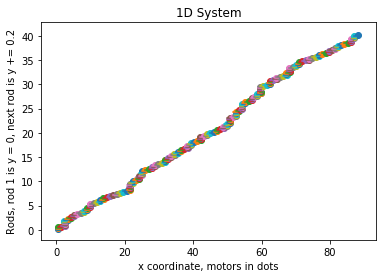

In [13]:
plotSystem(rods, motors, numberOfRods, gridPoints)

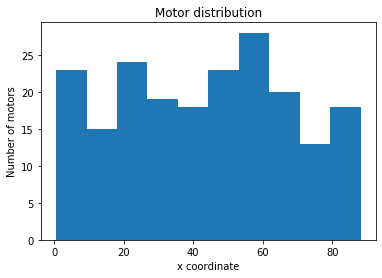

In [14]:
plotMotorPositions(rods, motors, numberOfRods)

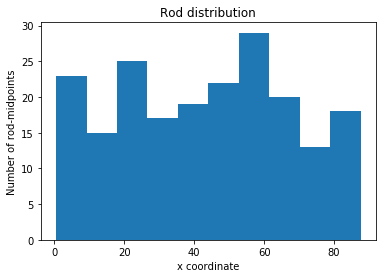

In [15]:
rodMidPointPositions(rods, numberOfRods)

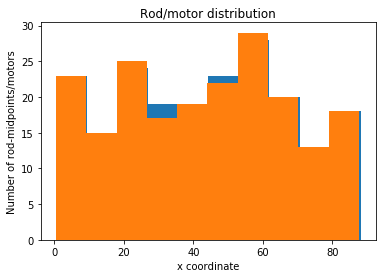

In [16]:
bothPositions(rods, motors, numberOfRods)

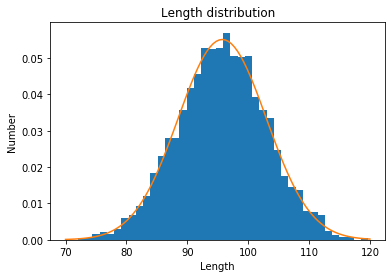

In [31]:
lengthDistribution(length)


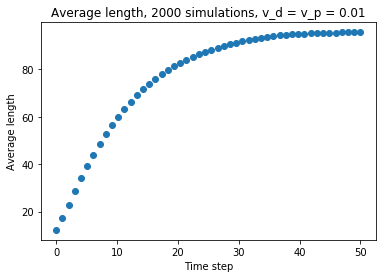

In [19]:
averageLengthEvolution(allLengths)